In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [179]:
df=pd.read_csv("car data.csv")

In [180]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [181]:
df.shape

(301, 9)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [183]:
df.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

<AxesSubplot:>

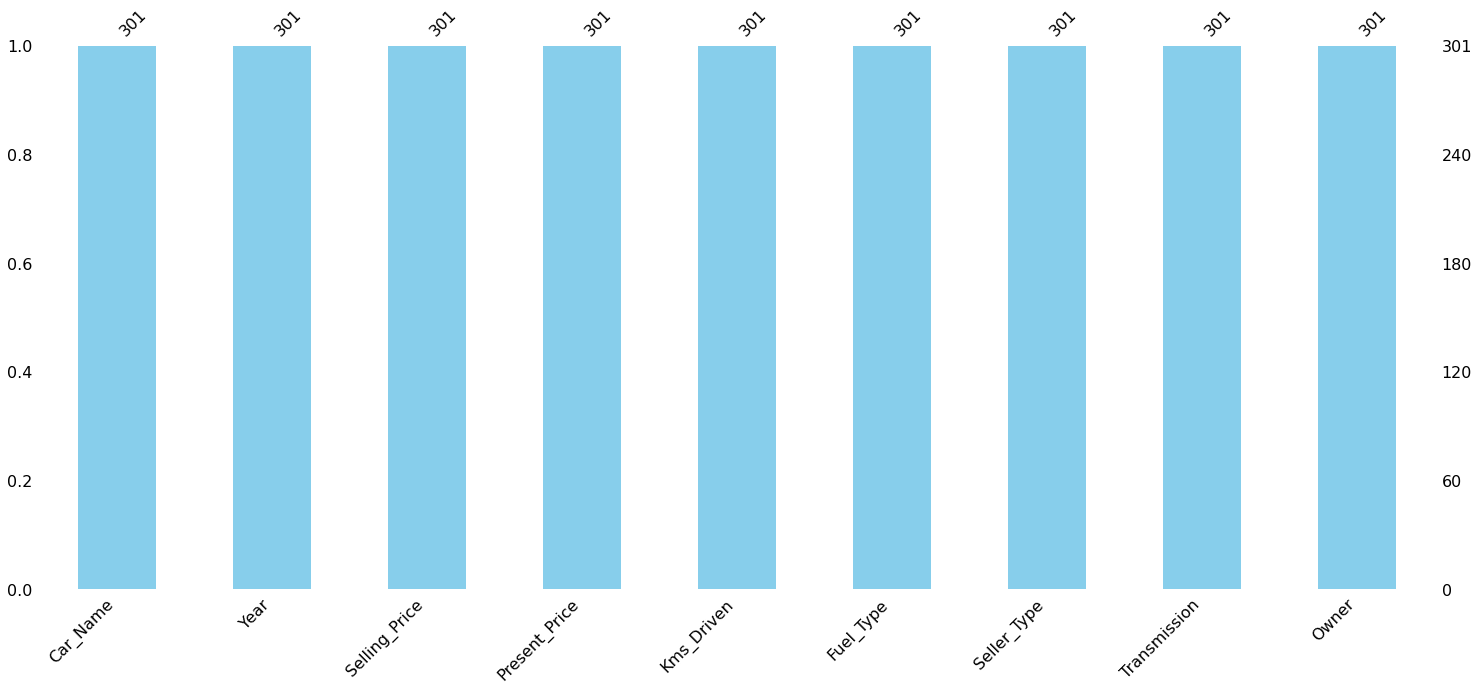

In [184]:
msno.bar(df,color='skyblue')

In [185]:
df.duplicated().sum()/len(df)*100

0.6644518272425249

In [186]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [187]:
df.describe(include=object)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [188]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


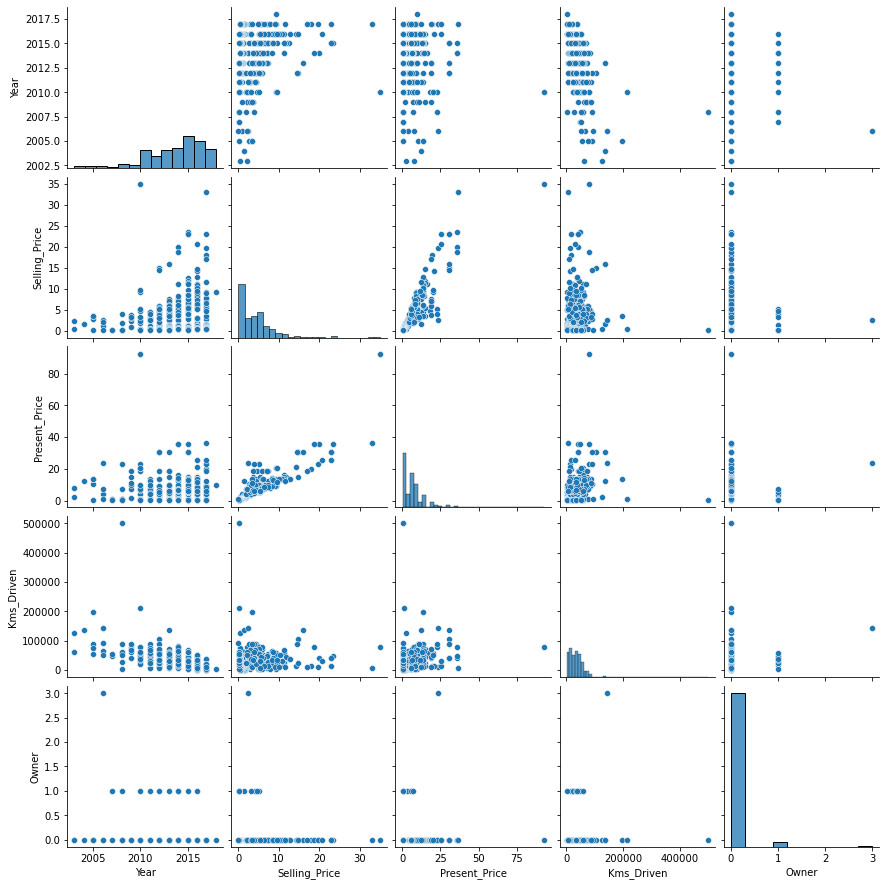

In [189]:
sns.pairplot(df)

In [190]:
# correlation

<AxesSubplot:>

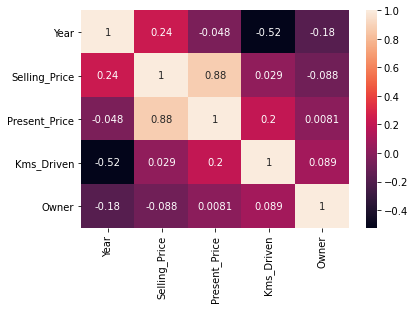

In [191]:
sns.heatmap(df.corr(),annot=True)

In [192]:
# distribution

In [193]:
num=['float','int64']
df_numeric=df.select_dtypes(num)
df_numeric

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


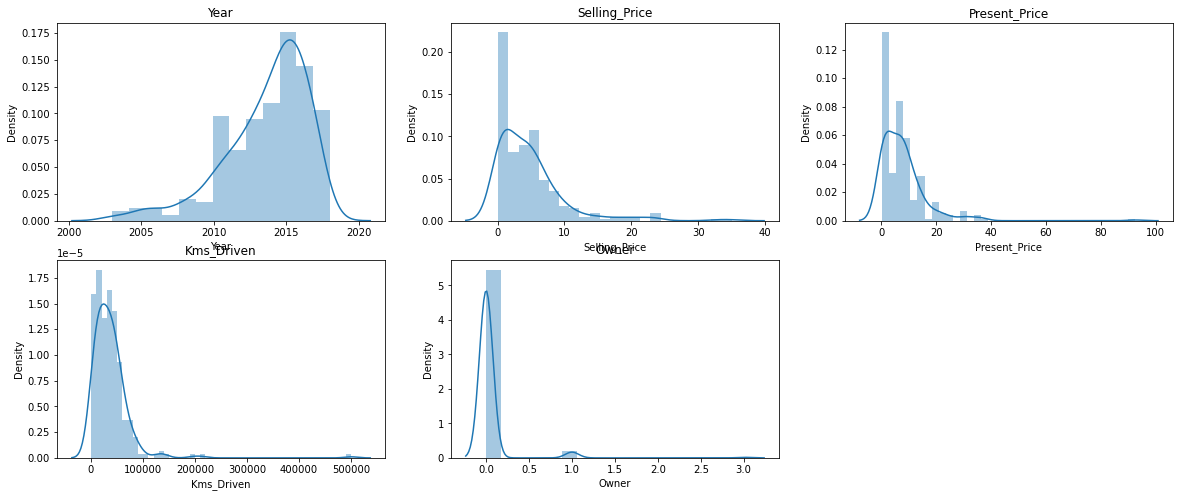

In [194]:
a=1
plt.figure(figsize=(20,8))
for i in df_numeric.columns:
    plt.subplot(2,3,a)
    sns.distplot(df_numeric[i],kde=True)
    plt.title(i)
    a=a+1
    

In [195]:
df_numeric.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [196]:
# outliers

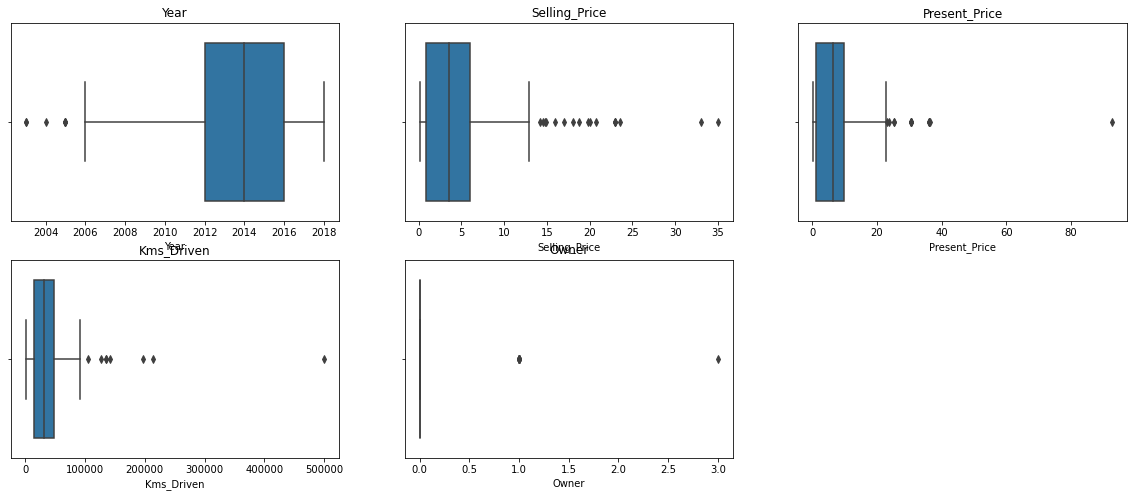

In [197]:
a=1
plt.figure(figsize=(20,8))
for i in df_numeric.columns:
    plt.subplot(2,3,a)
    sns.boxplot(df_numeric[i])
    plt.title(i)
    a=a+1
    

In [198]:
# feature enginerring

In [199]:
df['age']=2023-df['Year']
df.drop(columns=['Year'],inplace=True)

In [200]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [201]:
# One hot encoding

In [202]:
df1=pd.get_dummies(df,columns=['Fuel_Type' ,'Seller_Type','Transmission'],drop_first=True)

In [203]:
 df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,9,0,1,0,1
1,sx4,4.75,9.54,43000,0,10,1,0,0,1
2,ciaz,7.25,9.85,6900,0,6,0,1,0,1
3,wagon r,2.85,4.15,5200,0,12,0,1,0,1
4,swift,4.60,6.87,42450,0,9,1,0,0,1


In [204]:
df1.shape

(301, 10)

In [205]:
# Now we apply Mean Target Encoding since there is more categories in car name so we can perform one hot encoding because dimenmsionality will be increase

In [206]:
df2=df1.groupby(['Car_Name'])['Selling_Price'].agg(['mean']).reset_index()

In [207]:
l=[]
for i in df1['Car_Name']:
    for j ,k in df2.iterrows():
        if i==k['Car_Name']:
            l.append(k['mean'])

In [208]:
l

[2.8625000000000003,
 3.158333333333333,
 7.472222222222222,
 2.5125,
 4.54,
 9.25,
 7.472222222222222,
 6.5,
 7.472222222222222,
 7.472222222222222,
 2.85,
 7.472222222222222,
 7.472222222222222,
 6.7749999999999995,
 4.475,
 6.7749999999999995,
 6.7749999999999995,
 6.7749999999999995,
 2.5125,
 3.158333333333333,
 2.5700000000000003,
 4.9,
 3.158333333333333,
 2.5700000000000003,
 2.5125,
 4.54,
 4.54,
 4.54,
 2.5700000000000003,
 7.472222222222222,
 2.8625000000000003,
 2.8625000000000003,
 4.54,
 6.7749999999999995,
 4.475,
 3.158333333333333,
 4.475,
 0.35,
 2.5700000000000003,
 3.158333333333333,
 5.85,
 2.5700000000000003,
 3.158333333333333,
 4.475,
 1.25,
 7.472222222222222,
 2.8625000000000003,
 2.5125,
 6.7749999999999995,
 7.472222222222222,
 18.685454545454544,
 18.685454545454544,
 12.777777777777779,
 18.685454545454544,
 12.777777777777779,
 7.1831249999999995,
 4.633333333333334,
 7.1831249999999995,
 4.266666666666667,
 18.685454545454544,
 7.1831249999999995,
 4.633

In [209]:
df1['Car_Name']=l

In [210]:
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2.862500,3.35,5.59,27000,0,9,0,1,0,1
1,3.158333,4.75,9.54,43000,0,10,1,0,0,1
2,7.472222,7.25,9.85,6900,0,6,0,1,0,1
3,2.512500,2.85,4.15,5200,0,12,0,1,0,1
4,4.540000,4.60,6.87,42450,0,9,1,0,0,1


In [211]:
# segregate x and y 

In [212]:
x=df1.drop(columns=['Selling_Price'])
y=df1['Selling_Price']

In [213]:
ST= StandardScaler()

In [214]:
x_scaled=ST.fit_transform(x)

In [215]:
# split data into train and test

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [217]:
lr=LinearRegression()

In [218]:
lr.fit(x_train,y_train)

LinearRegression()

In [219]:
y_pred= lr.predict(x_test)

In [220]:
y_pred_train= lr.predict(x_train)

In [221]:
lr.intercept_

4.696535069902191

In [222]:
lr.coef_

array([ 1.76966308,  2.32942104, -0.24220462, -0.08281443, -0.98912304,
        0.51747603,  0.04634879, -0.2993242 , -0.48777528])

In [223]:
r2=r2_score(y_pred,y_test)
r2

0.8036228909211875

In [224]:
r2_score(y_pred_train,y_train)

0.8918680226250191

In [177]:
# Adjusted r2_score

In [226]:
1-((1-r2)*(40-1)/(40-2-1)) #by formula

0.7930079120520626

In [227]:
# REGULARIZATION

In [228]:
from sklearn.model_selection import GridSearchCV

In [229]:
rr=Ridge()

In [230]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
rid=GridSearchCV(rr,parameter,cv=5)

In [231]:
rid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]})

In [232]:
print(rid.best_params_)

{'alpha': 30}


In [233]:
rid_y_pred=rid.predict(x_test)

In [234]:
rid_y_pred_train=rid.predict(x_train)

In [235]:
r2_score(rid_y_pred,y_test)

0.768409742207502

In [236]:
r2_score(rid_y_pred_train,y_train)

0.8765522136641295

In [237]:
# Lasso()

In [238]:
lasso=Lasso()

In [239]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
las=GridSearchCV(lasso,parameter,cv=5)

In [240]:
las.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]})

In [241]:
print(las.best_params_)

{'alpha': 1}


In [242]:
y_pred=las.predict(x_test)

In [243]:
y_pred_train=las.predict(x_train)

In [244]:
r2_score(y_pred,y_test)

0.16013871217165843

In [245]:
r2_score(y_pred_train,y_train)

0.647276312452734